# Chapter 3: vectorize contextual information

In this chapter you will take a document, split it into chunks and embed the chunks (transform their meaning into vectors). You will then save the vectorized chunks into a file.

## Download the "context" document

When we talk to our LLM, we want to make sure it is informed about some external facts that might be too specialized for it to know. For example, some internal company document, some piece of news, or some specialized piece of knowledge that cannot be found on the internet. In our example, we want to have as a context the Dutch National Climate Agreement of 2020.

In [ ]:
# pip install requests

In [4]:
import requests

document_link = "https://english.rvo.nl/sites/default/files/2020/07/National%20Climate%20Agreement%20The%20Netherlands%20-%20English.pdf"

document = requests.get(document_link)
print(document.text[:500])

%PDF-1.7

4 0 obj
(Identity)
endobj
5 0 obj
(Adobe)
endobj
8 0 obj
<<
/Filter /FlateDecode
/Length 53296
/Type /Stream
>>
stream
d����977���w����~��y���s�s��y�s�0B��Gr݄�����BxN7B��7�ՏDy�j�>�
We5�m�pz�M��"���a¤�kߩ	!<~/<���	��%W�"����]�ucږ�c�B�R��\8���u�mG���\���>��ؿkvϜ�nÊ"�i��m���=� ��G���s��}����#�-B�Y�Κ�}�a��7�W΅����+a?g��e+oɜ�<;!��YK.i�߉�+�FH�,�9���7z�!�W���Ѯ���<�^<}���g�]o}��vXϢ��b-h%�'���Y


The document is a pdf, but we need to extract the text from it. First we save the pdf file, then we manage it with a pdf package.

In [5]:
with open("National_Climate_Agreement_Netherlands.pdf", "wb") as f:
    f.write(document.content)

print("PDF saved successfully. You should see it saved in the working folder.")

PDF saved successfully. You should see it saved in the working folder.


In [ ]:
# pip install PyPDF2

In [7]:
import PyPDF2

with open("National_Climate_Agreement_Netherlands.pdf", "rb") as f:
    reader = PyPDF2.PdfReader(f)
    print("Number of pages:", len(reader.pages))
    print("First page text:")
    print(reader.pages[0].extract_text())

Number of pages: 247
First page text:
1 
 
 
 
 
 
 
 
Climate Agreement 
 
 
 
 
 
 
The Hague 
28 June 2019 


## Parse it into chunks

Now we split the document into chunks and store them in a list. We choose the chunk size to be equal to a page.

In [8]:
with open("National_Climate_Agreement_Netherlands.pdf", "rb") as f:
    reader = PyPDF2.PdfReader(f)
    num_pages = len(reader.pages)
    # Starting from page 4, after the index
    chunks = [reader.pages[i].extract_text() for i in range(4, num_pages)]

In [9]:
print("Number of chunks: ", len(chunks))
print("Number of letters in the first chunk:", len(chunks[0]))

Number of chunks:  243
Number of letters in the first chunk: 3227


In [ ]:
# pip install matplotlib

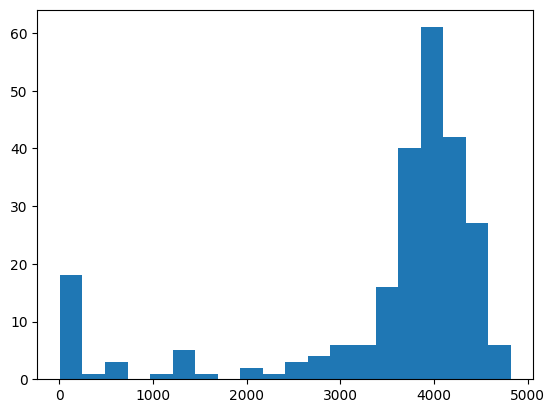

In [10]:
# Plot the chunk size distribution with matplotlib
import matplotlib.pyplot as plt

plt.hist([*map(len, chunks)], bins=20)
plt.show()

In [ ]:
# Delete the chunks containing less than 20 characters
chunks = ...

## Vectorize the chunks

Having the chunks of text ready, we now "embed" them in a vector space.

In [ ]:
# pip install sentence-transformers

In [13]:
from sentence_transformers import SentenceTransformer
import warnings
warnings.filterwarnings("ignore")

model = SentenceTransformer("all-MiniLM-L6-v2") # you can also use a lighter module
 
def embed_chunk(text:str, model:SentenceTransformer):
    return model.encode(text)

print(embed_chunk(chunks[0], model=model))

[-1.71638019e-02  1.14984594e-01  7.37626478e-02 -1.60305984e-02
  7.84534067e-02 -4.36328631e-03 -4.79596741e-02  4.85519925e-03
  2.01851670e-02  1.87497456e-02 -6.48218691e-02 -9.94562656e-02
 -6.49070963e-02  6.35451227e-02  1.98471900e-02 -2.41781678e-02
 -9.35174078e-02  4.33747331e-03 -5.47525026e-02 -9.38836113e-03
  1.19935814e-02  1.58254113e-02  2.15838030e-02  2.94348374e-02
 -8.09530467e-02 -3.09172273e-02  1.55891851e-02 -4.44383398e-02
 -6.14061058e-02  1.17104553e-01  3.20510641e-02  1.62228402e-02
 -1.48849012e-02  6.85047312e-03 -4.59654219e-02 -3.88130657e-02
  2.59016436e-02 -4.01644222e-02 -8.64026472e-02  4.45912890e-02
 -2.05999427e-02 -8.62277746e-02 -6.78245798e-02 -5.82792088e-02
 -2.63392646e-02  7.18733817e-02 -3.82564701e-02  2.98465532e-03
 -1.19534187e-01 -3.47017124e-02  7.18952045e-02  1.04445545e-03
 -5.46123832e-02 -6.87076673e-02 -1.35799162e-02 -9.73480754e-03
 -1.28926430e-02  4.33520339e-02  2.84047448e-03 -2.94093583e-02
  3.78594138e-02 -7.35547

Now we have a way to convert a text into a vector, which can be used to represent the overall "meaning" of the chunk. Embeddings can be usually created with a transformer model. 

As an exercise, create a function that uses the OpenAI embeddings API, instead of the sentence-transformers package.

## Save the vector-chunk pairs

Now run the function over each chunk, and save the vector-chunk pairs into a list of tuples, that you will later pickle.

In [14]:
vector_chunk_list = []

for chunk in chunks:
    vector = embed_chunk(chunk, model)
    vector_chunk_list.append((vector, chunk))

In [1]:
import pickle

# Save the file as pickle. Why? It is just a standard way to store Python objects, albeit not the best choice.

#TODO